In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 패키지
import scipy.stats as spst
import statsmodels.api as sm # 선형회귀나 로지스틱회귀에서 전~할때
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #잔차분석 (그래프그릴때)

from sklearn.metrics import *

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
path = 'https://bit.ly/3EZKMUU'

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,defeat,datetime,v021,v087,v088,v089,v114,v115,v116,v117,...,v527,v528,v571,v572,v573,v574,v575,v576,v577,v578
0,normal,19/07/2008 11:55:00,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,...,0.5064,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509
1,normal,19/07/2008 12:32:00,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,...,0.8832,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003
2,defeat,19/07/2008 13:17:00,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,...,0.6451,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721
3,normal,19/07/2008 14:43:00,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,...,0.7404,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831
4,normal,19/07/2008 15:22:00,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,...,2.2181,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698


In [6]:
target = ['defeat']
x = data.drop(columns=['defeat', 'datetime'], axis=1)

In [7]:
x.head()

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v527,v528,v571,v572,v573,v574,v575,v576,v577,v578
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,0.5064,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,0.8832,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,0.6451,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,0.7404,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,2.2181,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698


In [8]:
y = data.loc[:, target]

In [9]:
y.head()

,defeat
0,normal
1,normal
2,defeat
3,normal
4,normal


In [19]:
y = pd.get_dummies(y, columns = ['defeat'], drop_first = True)

In [14]:
x.isna().sum()

v021    0
v087    0
v088    0
v089    0
v114    0
v115    0
v116    0
v117    0
v118    0
v120    0
v121    0
v157    0
v222    0
v223    0
v224    0
v249    0
v250    0
v251    0
v252    0
v253    0
v255    0
v256    0
v292    0
v360    0
v361    0
v362    0
v387    0
v388    0
v389    0
v390    0
v391    0
v393    0
v394    0
v430    0
v494    0
v495    0
v496    0
v521    0
v522    0
v523    0
v524    0
v525    0
v527    0
v528    0
v571    0
v572    0
v573    0
v574    0
v575    0
v576    0
v577    0
v578    0
dtype: int64

In [15]:
y.isna().sum()

defeat    0
dtype: int64

In [ ]:
 Data split : train : val = 7:3, random_state = 2022

 알고리즘 XGB ( 트리갯수 50, learning rate 0.1, max depth = 4)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier, plot_tree # XGB 분류기 (얘는 sklearn 아님)
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

In [22]:
model = XGBClassifier(n_estimators = 50, learning_rate=0.1, max_depth=4)

In [23]:
model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [24]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

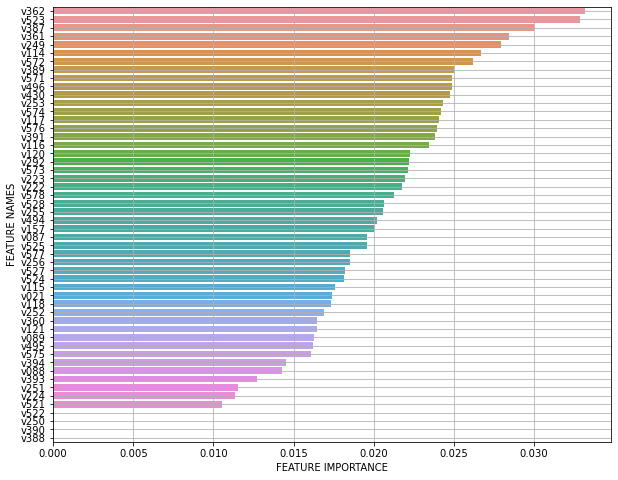

In [25]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)